# Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os



# Utils

In [10]:
def plot_mean_values(df, title, x_label='Deltas', y_label='Média'):
    mean_values = df.mean(axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(df.columns, mean_values, marker='o')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.title(title)
    plt.grid(True)
    plt.show()

In [11]:
def process_model_data(df, model_name, columns, column_name = "len_milp_relaxed"):
    model_data = df.query(f'modelo == "{model_name}"')[column_name]
    model_data = model_data.apply(eval)
    df_model = pd.DataFrame(model_data.tolist(), columns=columns)
    mean_values = np.mean(df_model, axis=0).to_list()
    std_values = np.std(df_model, axis=0).to_list()
    return df_model, mean_values, std_values

In [12]:
def format_mean_std(
    m1_mean: list,
    m2_mean: list,
    m3_mean: list,
    m1_std: list,
    m2_std: list,
    m3_std: list,
    columns: list,
    mean_format: str = "{:.2f}",
    std_format: str = "{:.4f}",
):
    df_mean = pd.DataFrame(
        [m1_mean, m2_mean, m3_mean], 
        columns=columns, index=["1L20N", "2L20N", "3L20N"]
    )
    df_std = pd.DataFrame(
        [m1_std, m2_std, m3_std], 
        columns=columns, index=["1L20N", "2L20N", "3L20N"]
    )

    df_formatted = (
        df_mean.apply(lambda row: row.map(mean_format.format))
        + " ± "
        + df_std.apply(lambda row: row.map(std_format.format))
    )
    df_formatted = df_formatted.T
    return df_formatted

In [13]:
# def plot_multiple_means(
#     dfs: list, 
#     titles: list,
#     colors: list,
#     x_label='Deltas', 
#     y_label='Média', 
#     plt_title='Comparação das Médias'
#     ):
    
#     plt.figure(figsize=(10, 6))
    
#     for df, title, color in zip(dfs, titles, colors):
#         mean_values = df.mean(axis=0)
#         plt.plot(df.columns, mean_values, marker='o', label=title, color=color)

#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.title(plt_title)
#     plt.grid(True)
#     plt.legend()
#     plt.show()

# def plot_multiple_means(
#     dfs: list, 
#     titles: list,
#     colors: list,
#     x_label='Deltas', 
#     y_label='Média', 
#     plt_title='Comparação das Médias'
# ):
#     plt.figure(figsize=(10, 6))
    
#     for df, title, color in zip(dfs, titles, colors):
#         mean_values = df.mean(axis=0)
#         std_values = df.std(axis=0)
#         x = df.columns.astype(float)  # Certifique-se que são valores numéricos

#         plt.plot(x, mean_values, marker='o', label=title, color=color)
#         plt.fill_between(
#             x, 
#             mean_values - std_values, 
#             mean_values + std_values, 
#             color=color, 
#             alpha=0.2
#         )

#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.title(plt_title)
#     plt.grid(True)
#     plt.legend()
#     plt.show()

import matplotlib.pyplot as plt

def plot_multiple_means(
    dfs: list, 
    titles: list,
    colors: list,
    x_label='Deltas', 
    y_label='Média', 
    plt_title='Comparação das Médias',
    show_std: bool = False
):
    plt.figure(figsize=(10, 6))
    
    for df, title, color in zip(dfs, titles, colors):
        mean_values = df.mean(axis=0)
        x = df.columns.astype(float)  # ou use range(len(df.columns)) se necessário

        plt.plot(x, mean_values, marker='o', label=title, color=color)

        if show_std:
            std_values = df.std(axis=0)
            plt.fill_between(
                x, 
                mean_values - std_values, 
                mean_values + std_values, 
                color=color, 
                alpha=0.2
            )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plt_title)
    plt.grid(True)
    plt.legend()
    plt.show()


# Data

In [14]:

path = os.path.join(
    # "results",
    "relaxed",
    "get_explanation_range",
    "layers 0_1_2_3 relaxed"
)


iris = pd.read_csv(os.path.join(path, "iris.csv"))
wine = pd.read_csv(os.path.join(path, "wine.csv"))
breast_cancer = pd.read_csv(os.path.join(path, "breast_cancer.csv"))
glass = pd.read_csv(os.path.join(path, "glass.csv"))
# digits = pd.read_csv(os.path.join(path, "digits.csv"))

data = pd.concat([
    iris,
    wine,
    breast_cancer,
    glass,
    # digits
    ], ignore_index=True)
data

,dataset,modelo,instance,relaxed_times,relaxed_len_eq,relaxed_len_range,relaxed_explanation
0,iris,model_1layers_20neurons.h5,0,"[0.05761837959289551, 0.03821539878845215, 0.0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.4375, 'x_1': 0.3749999999999..."
1,iris,model_1layers_20neurons.h5,1,"[0.0302734375, 0.028959035873413086, 0.0338349...","[0, 0, 1, 1, 2, 2, 2, 3, 3, 3]","[4, 4, 3, 3, 2, 2, 2, 1, 1, 1]","[{'eq': {}, 'range': [docplex.mp.RangeConstrai..."
2,iris,model_1layers_20neurons.h5,2,"[0.038210391998291016, 0.03719758987426758, 0....","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.9375, 'x_1': 0.25, 'x_2': 1...."
3,iris,model_1layers_20neurons.h5,3,"[0.03998422622680664, 0.03872966766357422, 0.0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.40625, 'x_1': 0.437499999999..."
4,iris,model_1layers_20neurons.h5,4,"[0.0374913215637207, 0.0387723445892334, 0.041...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.65625, 'x_1': 0.374999999999..."
...,...,...,...,...,...,...,...
1195,glass,model_3layers_20neurons.h5,95,"[0.11317062377929688, 0.1040349006652832, 0.10...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.2201591511936271, 'x_1': 0.3..."
1196,glass,model_3layers_20neurons.h5,96,"[0.11961698532104492, 0.13824844360351562, 0.1...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.2851458885941582, 'x_1': 0.5..."
1197,glass,model_3layers_20neurons.h5,97,"[0.11434531211853027, 0.11472082138061523, 0.1...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.4770114942528778, 'x_1': 0.5..."
1198,glass,model_3layers_20neurons.h5,98,"[0.11606884002685547, 0.11424875259399414, 0.1...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.2347480106100903, 'x_1': 0.4..."


In [15]:
deltas = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Iris

### Tamanho

In [16]:
iris_m1, iris_m1_mean, iris_m1_std = process_model_data(
    df=iris,
    model_name='model_1layers_20neurons.h5',
    columns=deltas,
    column_name="relaxed_len_eq"
)
iris_m2, iris_m2_mean, iris_m2_std = process_model_data(
    df=iris,
    model_name='model_2layers_20neurons.h5',
    columns=deltas,
    column_name="relaxed_len_eq"
)

iris_m3, iris_m3_mean, iris_m3_std = process_model_data(
    df=iris,
    model_name='model_3layers_20neurons.h5',
    columns=deltas,
    column_name="relaxed_len_eq"
)

format_mean_std(iris_m1_mean, iris_m2_mean, iris_m3_mean, iris_m1_std, iris_m2_std, iris_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,2.52 ± 1.9312,2.30 ± 1.7292,3.34 ± 1.0509
0.2,2.76 ± 1.6560,2.93 ± 1.1511,3.61 ± 0.6465
0.3,3.10 ± 1.2207,3.11 ± 0.9044,3.70 ± 0.5196
0.4,3.29 ± 0.9622,3.27 ± 0.7464,3.82 ± 0.3842
0.5,3.43 ± 0.8032,3.38 ± 0.6129,3.87 ± 0.3363
0.6,3.54 ± 0.6545,3.40 ± 0.5831,3.90 ± 0.3000
0.7,3.62 ± 0.5437,3.45 ± 0.5172,3.90 ± 0.3000
0.8,3.64 ± 0.5004,3.46 ± 0.4984,3.93 ± 0.2551
0.9,3.65 ± 0.4770,3.46 ± 0.4984,3.93 ± 0.2551
1.0,3.65 ± 0.4770,3.46 ± 0.4984,3.93 ± 0.2551


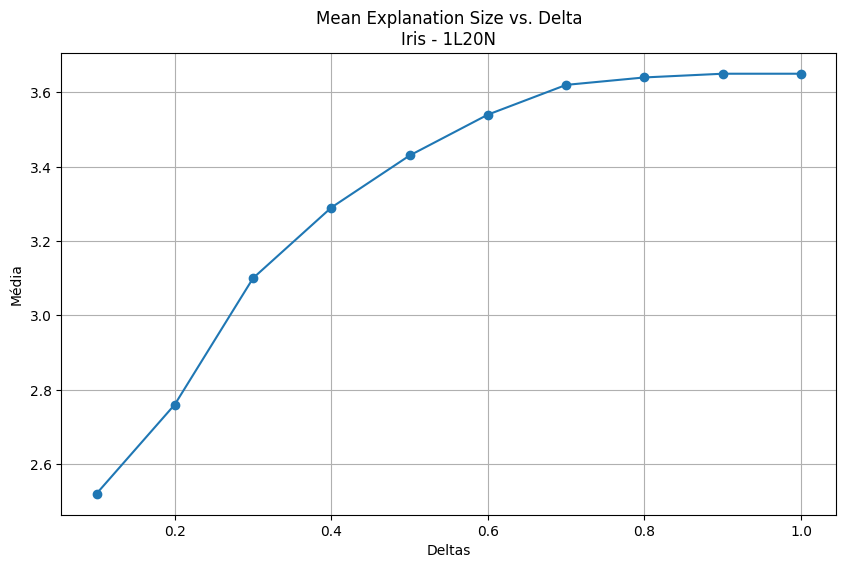

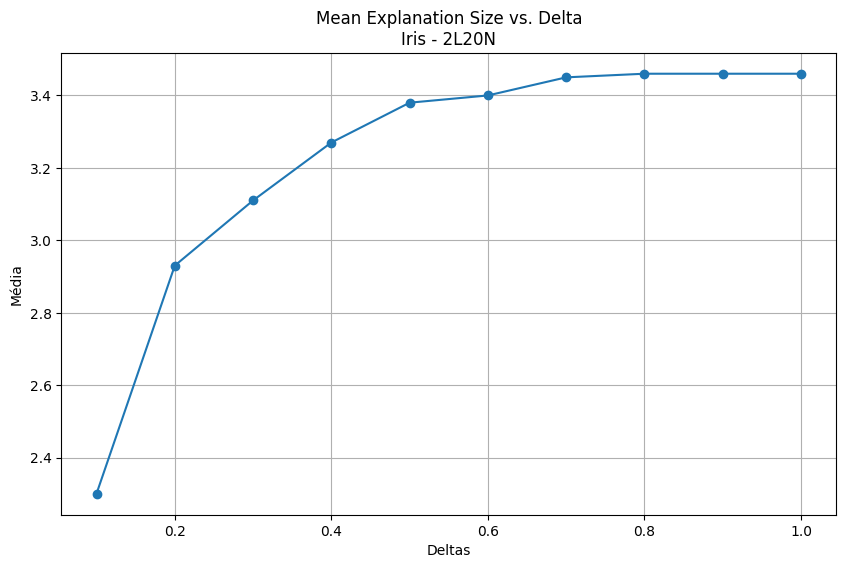

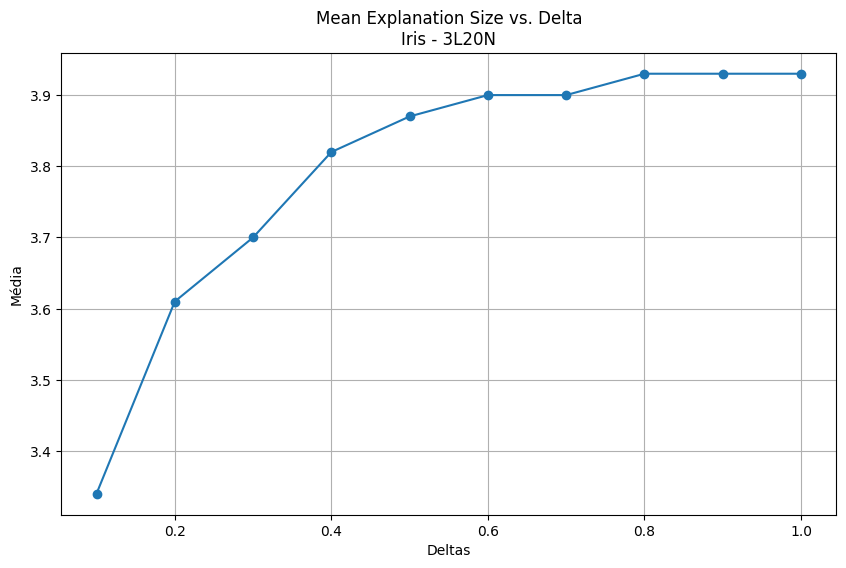

In [17]:
plot_mean_values(iris_m1, 'Mean Explanation Size vs. Delta\nIris - 1L20N')
plot_mean_values(iris_m2, 'Mean Explanation Size vs. Delta\nIris - 2L20N')
plot_mean_values(iris_m3, 'Mean Explanation Size vs. Delta\nIris - 3L20N')

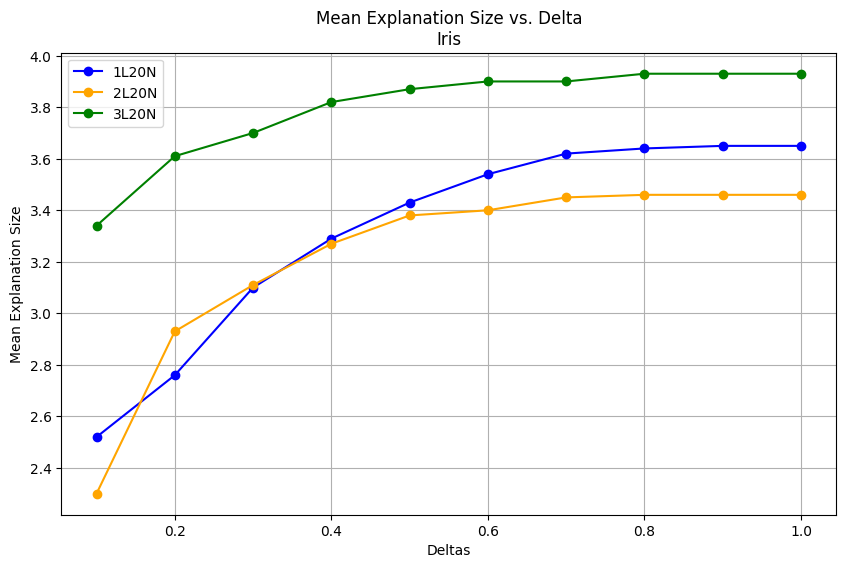

In [18]:
plot_multiple_means(
    dfs=[iris_m1, iris_m2, iris_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Explanation Size vs. Delta\nIris',
    x_label='Deltas',
    y_label='Mean Explanation Size'
)


In [19]:
# plot_multiple_means(
#     dfs=[iris_m1, iris_m2, iris_m3],
#     titles=['1L20N', '2L20N', '3L20N'],
#     colors=['blue', 'orange', 'green'],
#     plt_title='Mean Explanation Size vs. Delta\nIris',
#     x_label='Deltas',
#     y_label='Mean Explanation Size',
#     show_std=True
# )


### Tempo

In [20]:
iris_m1, iris_m1_mean, iris_m1_std = process_model_data(iris, "model_1layers_20neurons.h5", deltas, column_name="relaxed_times")
iris_m2, iris_m2_mean, iris_m2_std = process_model_data(iris, "model_2layers_20neurons.h5", deltas, column_name="relaxed_times")
iris_m3, iris_m3_mean, iris_m3_std = process_model_data(iris, "model_3layers_20neurons.h5", deltas, column_name="relaxed_times")

format_mean_std(
    iris_m1_mean,
    iris_m2_mean,
    iris_m3_mean,
    iris_m1_std,
    iris_m2_std,
    iris_m3_std,
    deltas,
    mean_format="{:.4f}",
    std_format="{:.4f}",
)

,1L20N,2L20N,3L20N
0.1,0.0393 ± 0.0135,0.0621 ± 0.0412,0.0921 ± 0.0320
0.2,0.0425 ± 0.0229,0.0565 ± 0.0254,0.0954 ± 0.0560
0.3,0.0609 ± 0.0415,0.0590 ± 0.0286,0.0873 ± 0.0521
0.4,0.0526 ± 0.0282,0.0550 ± 0.0133,0.0846 ± 0.0496
0.5,0.0557 ± 0.0306,0.0599 ± 0.0358,0.0737 ± 0.0422
0.6,0.0488 ± 0.0191,0.0584 ± 0.0354,0.0664 ± 0.0305
0.7,0.0463 ± 0.0196,0.0563 ± 0.0279,0.0640 ± 0.0221
0.8,0.0414 ± 0.0102,0.0528 ± 0.0159,0.0663 ± 0.0294
0.9,0.0472 ± 0.0288,0.0526 ± 0.0111,0.0692 ± 0.0351
1.0,0.0404 ± 0.0082,0.0641 ± 0.0427,0.0680 ± 0.0290


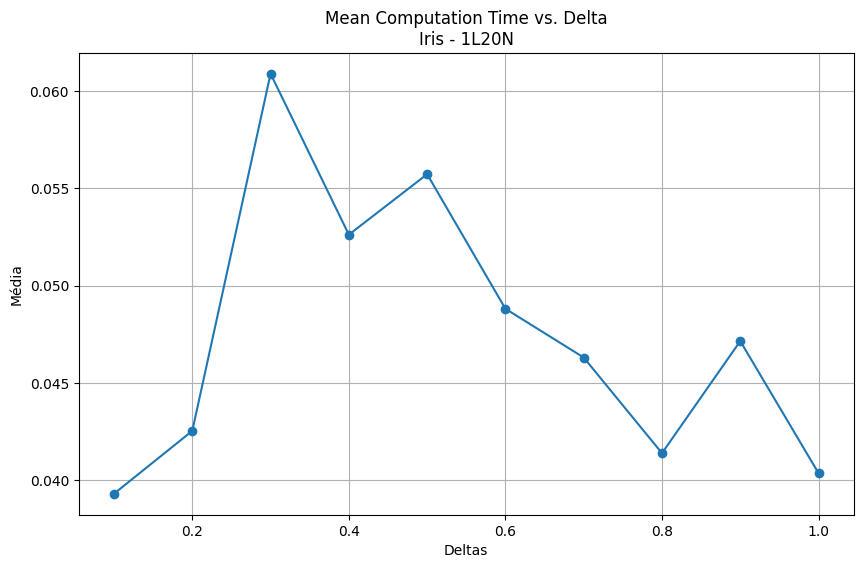

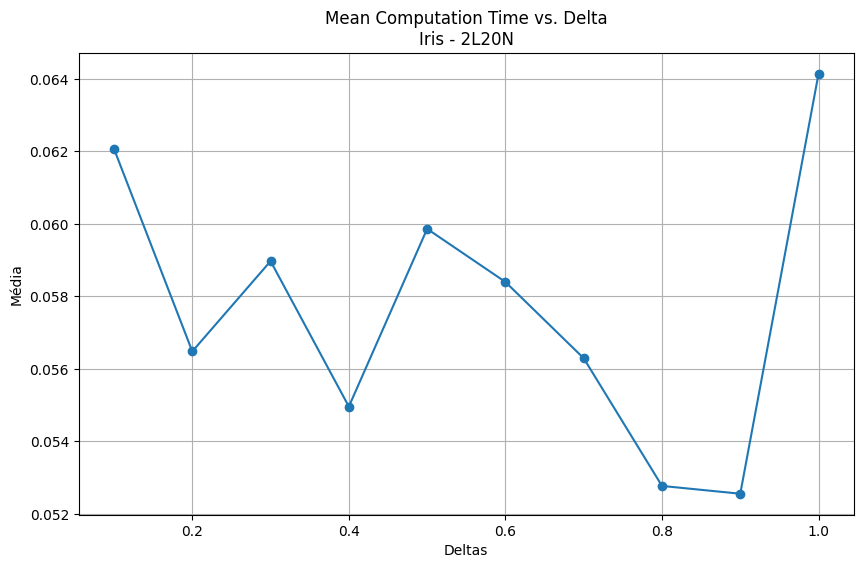

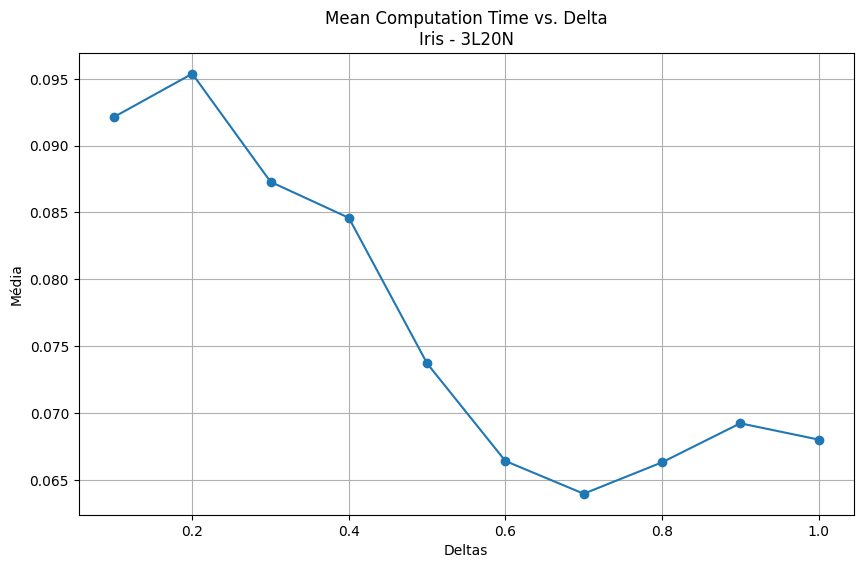

In [21]:
plot_mean_values(iris_m1, 'Mean Computation Time vs. Delta\nIris - 1L20N')
plot_mean_values(iris_m2, 'Mean Computation Time vs. Delta\nIris - 2L20N')
plot_mean_values(iris_m3, 'Mean Computation Time vs. Delta\nIris - 3L20N')

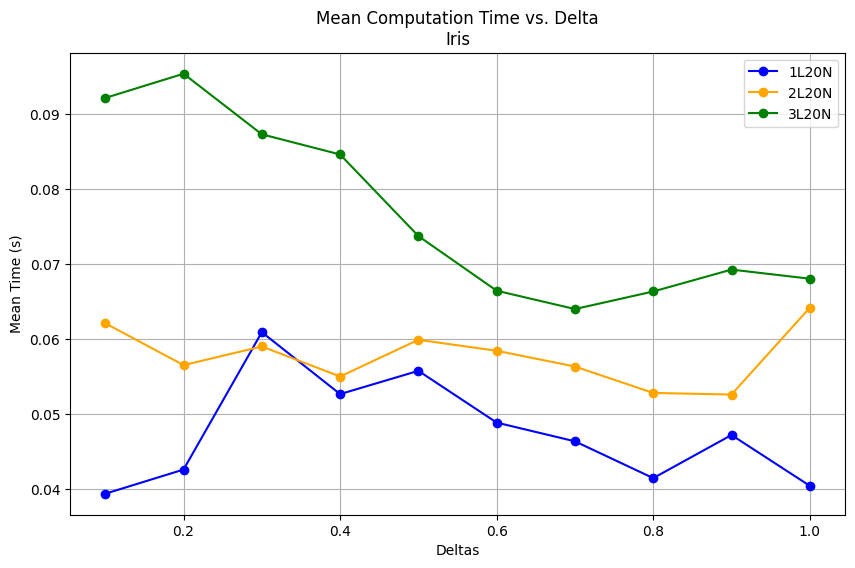

In [22]:
plot_multiple_means(
    dfs=[iris_m1, iris_m2, iris_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Computation Time vs. Delta\nIris',
    x_label='Deltas',
    y_label='Mean Time (s)',
)

# Wine

### Tamanho

In [23]:
wine_m1, wine_m1_mean, wine_m1_std = process_model_data(wine, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
wine_m2, wine_m2_mean, wine_m2_std = process_model_data(wine, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
wine_m3, wine_m3_mean, wine_m3_std = process_model_data(wine, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(wine_m1_mean, wine_m2_mean, wine_m3_mean, wine_m1_std, wine_m2_std, wine_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,12.67 ± 1.7091,12.94 ± 0.5970,13.00 ± 0.0000
0.2,12.74 ± 1.2298,12.97 ± 0.2985,13.00 ± 0.0000
0.3,12.81 ± 0.9022,12.96 ± 0.3980,13.00 ± 0.0000
0.4,12.89 ± 0.5272,12.97 ± 0.2985,13.00 ± 0.0000
0.5,12.86 ± 0.6785,12.97 ± 0.2985,13.00 ± 0.0000
0.6,12.88 ± 0.5706,12.97 ± 0.2985,13.00 ± 0.0000
0.7,12.87 ± 0.6270,12.97 ± 0.2985,13.00 ± 0.0000
0.8,12.87 ± 0.6270,12.97 ± 0.2985,13.00 ± 0.0000
0.9,12.87 ± 0.6270,12.97 ± 0.2985,13.00 ± 0.0000
1.0,12.87 ± 0.6270,12.97 ± 0.2985,13.00 ± 0.0000


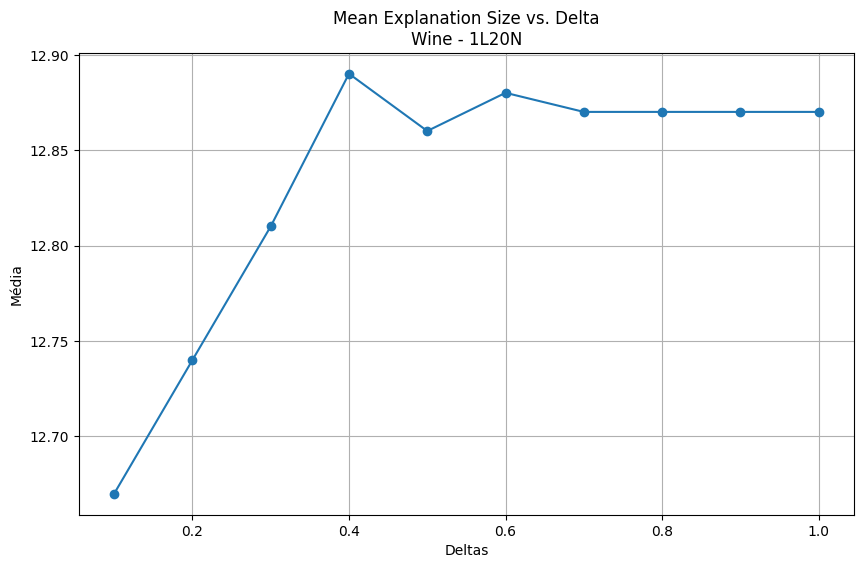

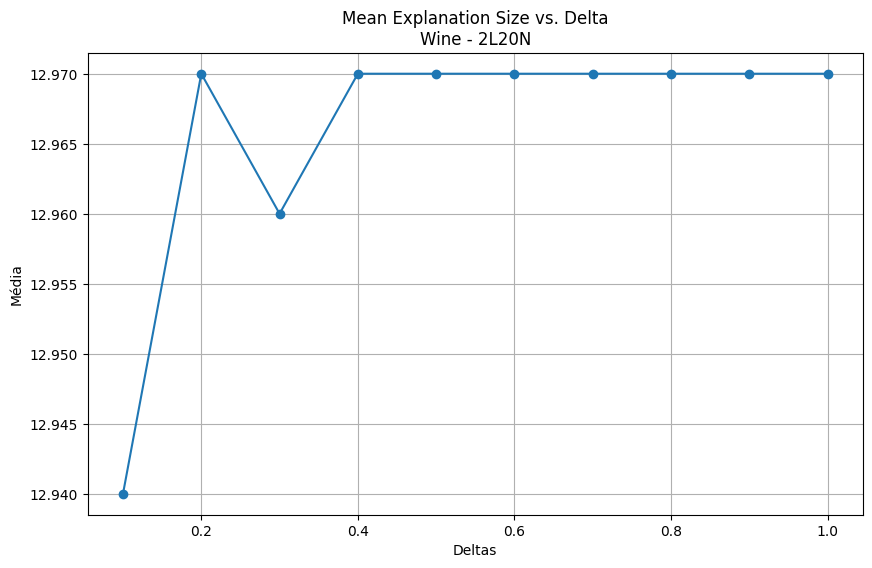

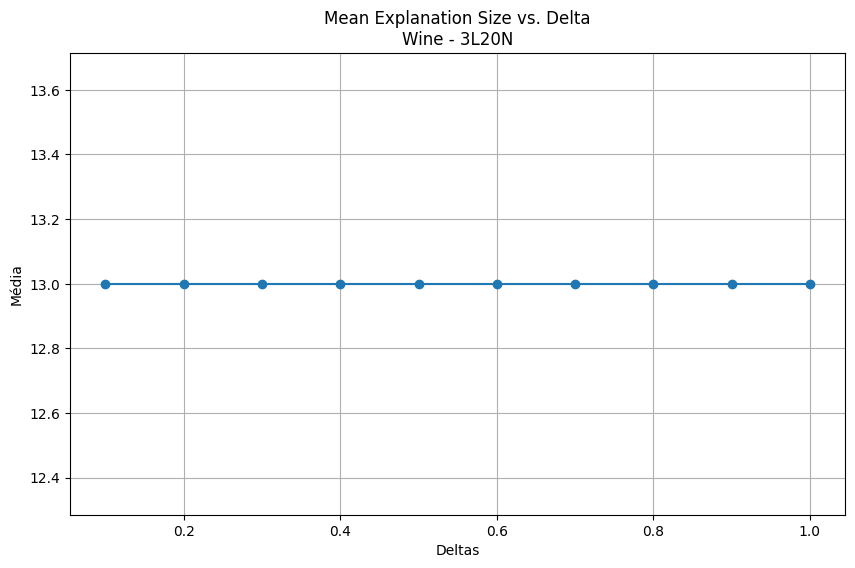

In [24]:
plot_mean_values(wine_m1, 'Mean Explanation Size vs. Delta\nWine - 1L20N')
plot_mean_values(wine_m2, 'Mean Explanation Size vs. Delta\nWine - 2L20N')
plot_mean_values(wine_m3, 'Mean Explanation Size vs. Delta\nWine - 3L20N')

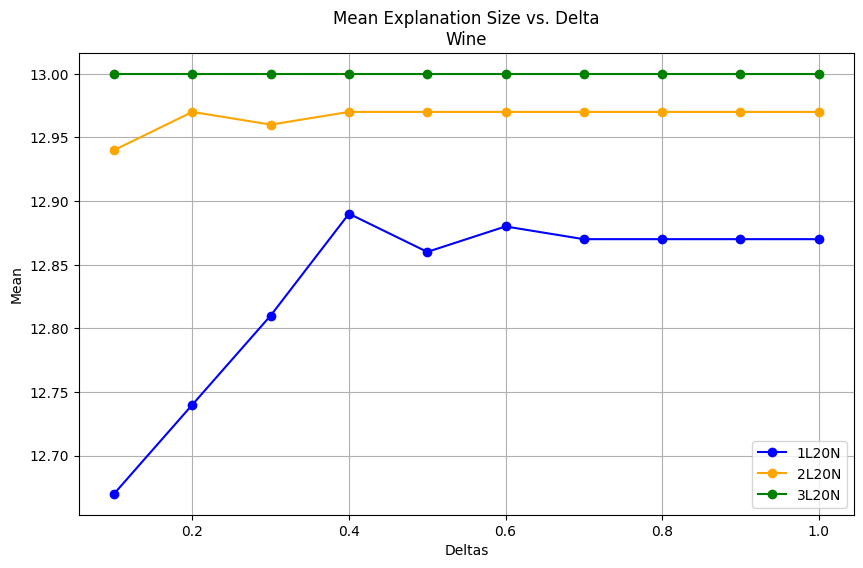

In [25]:
plot_multiple_means(
    dfs=[wine_m1, wine_m2, wine_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Explanation Size vs. Delta\nWine',
    x_label='Deltas',
    y_label='Mean',
)

### Tempo

In [26]:
wine_m1, wine_m1_mean, wine_m1_std = process_model_data(wine, 'model_1layers_20neurons.h5', deltas, column_name='relaxed_times')
wine_m2, wine_m2_mean, wine_m2_std = process_model_data(wine, 'model_2layers_20neurons.h5', deltas, column_name='relaxed_times')
wine_m3, wine_m3_mean, wine_m3_std = process_model_data(wine, 'model_3layers_20neurons.h5', deltas, column_name='relaxed_times')

format_mean_std(wine_m1_mean, wine_m2_mean, wine_m3_mean, wine_m1_std, wine_m2_std, wine_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.1291 ± 0.0404,0.1666 ± 0.0535,0.1809 ± 0.0292
0.2,0.1450 ± 0.0562,0.1642 ± 0.0630,0.1740 ± 0.0332
0.3,0.1208 ± 0.0287,0.1542 ± 0.0423,0.1779 ± 0.0355
0.4,0.1137 ± 0.0338,0.1425 ± 0.0239,0.1853 ± 0.0497
0.5,0.1133 ± 0.0427,0.1500 ± 0.0447,0.1755 ± 0.0249
0.6,0.1075 ± 0.0273,0.1418 ± 0.0258,0.1789 ± 0.0252
0.7,0.1072 ± 0.0200,0.1587 ± 0.0564,0.1903 ± 0.0528
0.8,0.1094 ± 0.0188,0.1531 ± 0.0428,0.1799 ± 0.0271
0.9,0.1116 ± 0.0308,0.1555 ± 0.0540,0.1786 ± 0.0237
1.0,0.1161 ± 0.0429,0.1522 ± 0.0651,0.1768 ± 0.0261


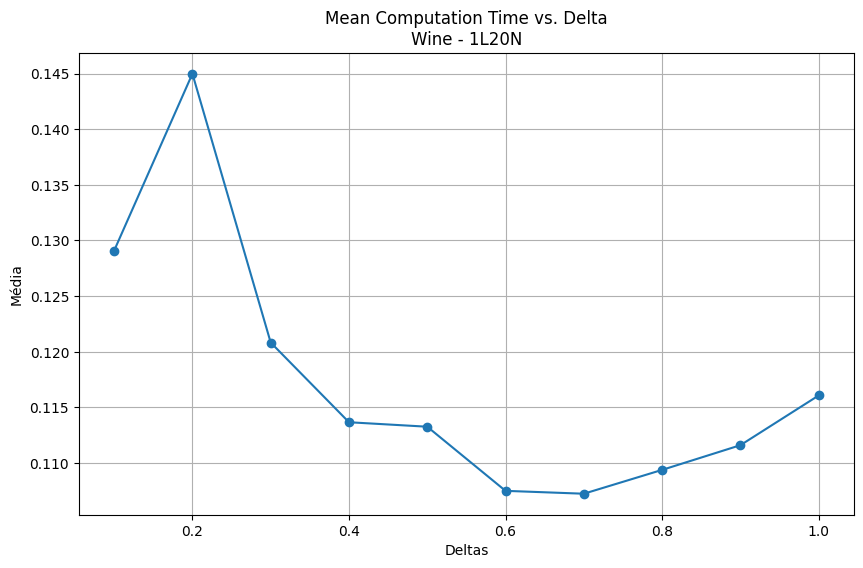

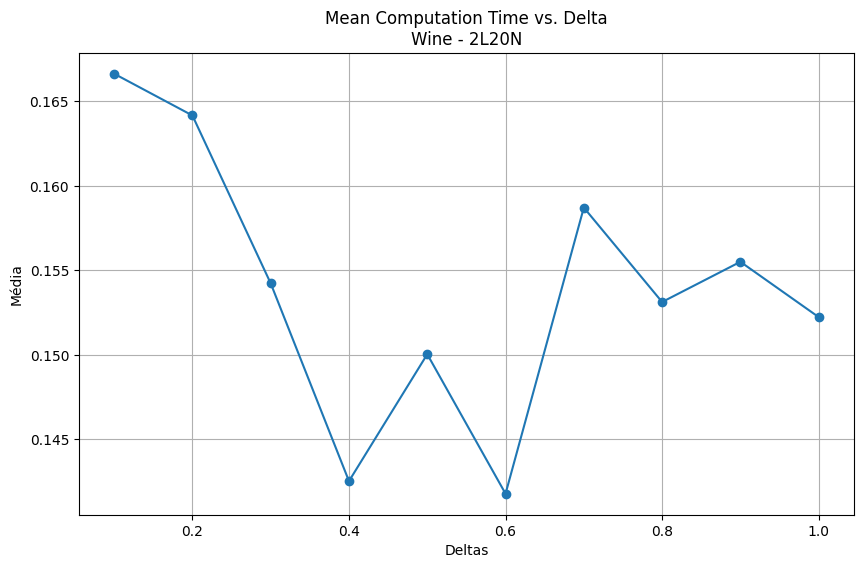

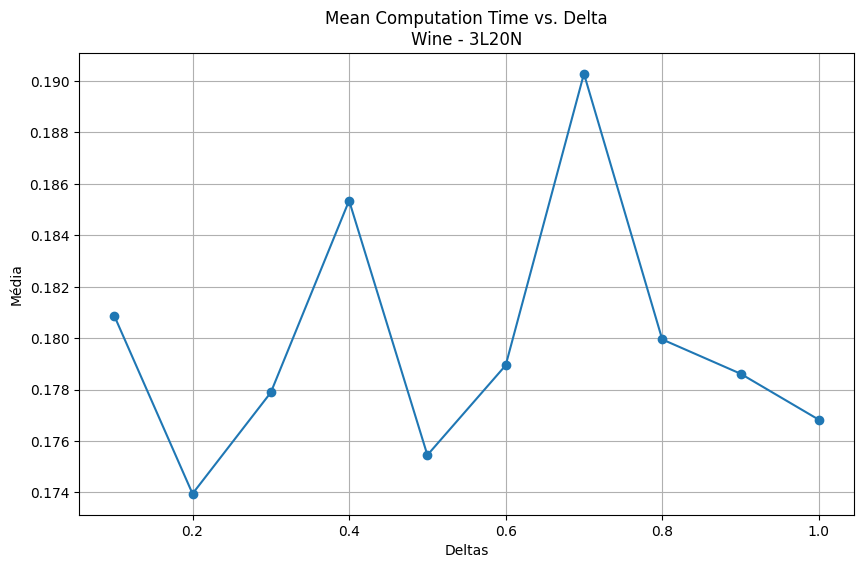

In [27]:
plot_mean_values(wine_m1, 'Mean Computation Time vs. Delta\nWine - 1L20N')
plot_mean_values(wine_m2, 'Mean Computation Time vs. Delta\nWine - 2L20N')
plot_mean_values(wine_m3, 'Mean Computation Time vs. Delta\nWine - 3L20N')

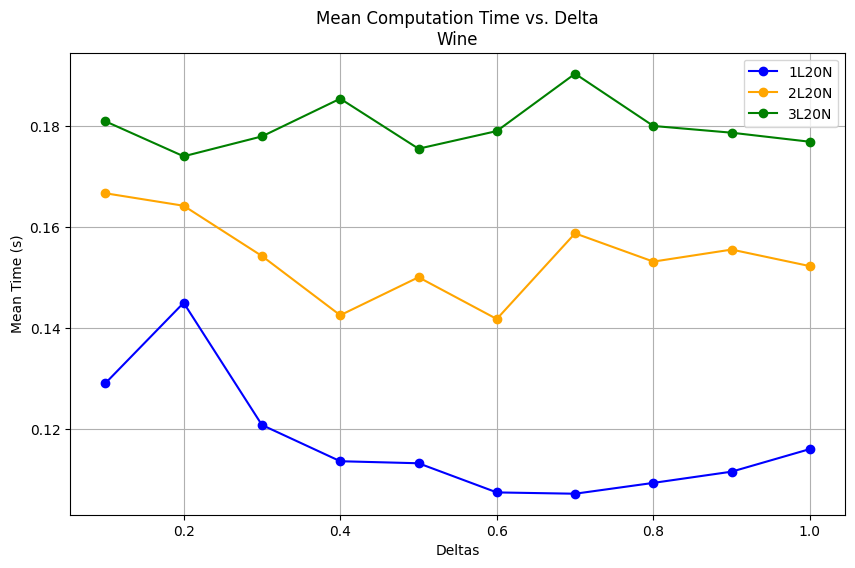

In [28]:
plot_multiple_means(
    dfs=[wine_m1, wine_m2, wine_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Computation Time vs. Delta\nWine',
    x_label='Deltas',
    y_label='Mean Time (s)',
)

# Breast Cancer

### Tamanho

In [29]:
breast_cancer_m1, breast_cancer_m1_mean, breast_cancer_m1_std = process_model_data(breast_cancer, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
breast_cancer_m2, breast_cancer_m2_mean, breast_cancer_m2_std = process_model_data(breast_cancer, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
breast_cancer_m3, breast_cancer_m3_mean, breast_cancer_m3_std = process_model_data(breast_cancer, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(breast_cancer_m1_mean, breast_cancer_m2_mean, breast_cancer_m3_mean, breast_cancer_m1_std, breast_cancer_m2_std, breast_cancer_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,28.34 ± 3.7848,30.00 ± 0.0000,30.00 ± 0.0000
0.2,28.80 ± 2.7964,30.00 ± 0.0000,30.00 ± 0.0000
0.3,28.83 ± 2.7787,30.00 ± 0.0000,30.00 ± 0.0000
0.4,28.97 ± 2.4309,30.00 ± 0.0000,30.00 ± 0.0000
0.5,29.02 ± 2.2538,30.00 ± 0.0000,30.00 ± 0.0000
0.6,29.08 ± 2.2212,30.00 ± 0.0000,30.00 ± 0.0000
0.7,29.03 ± 2.2515,30.00 ± 0.0000,30.00 ± 0.0000
0.8,29.05 ± 2.1835,30.00 ± 0.0000,30.00 ± 0.0000
0.9,29.04 ± 2.2312,30.00 ± 0.0000,30.00 ± 0.0000
1.0,29.04 ± 2.2312,30.00 ± 0.0000,30.00 ± 0.0000


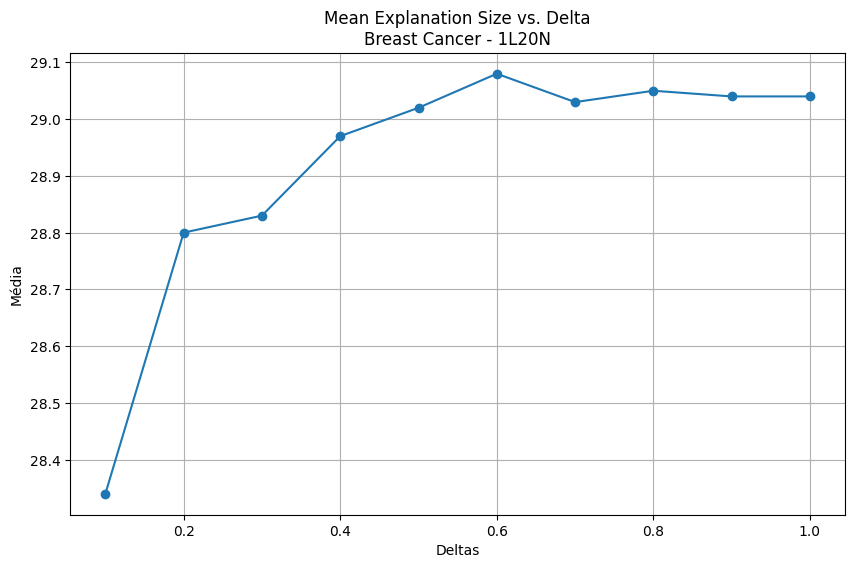

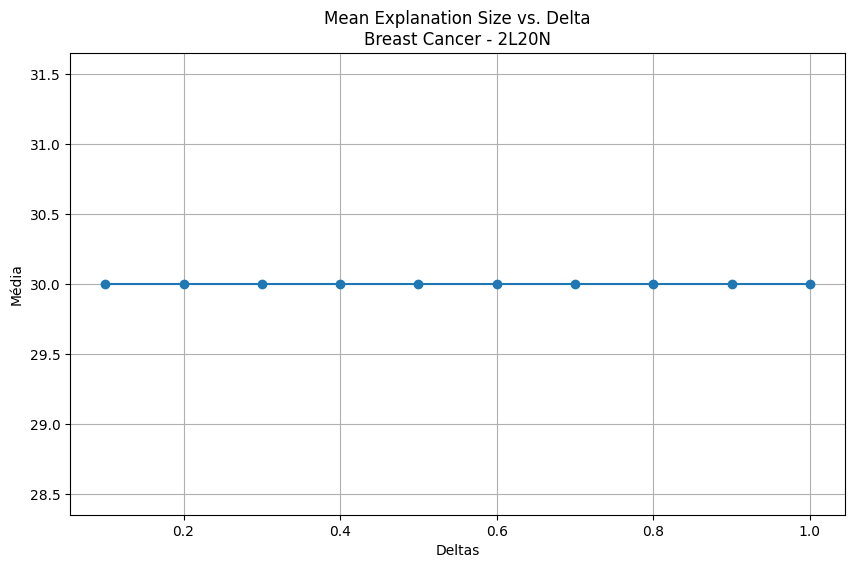

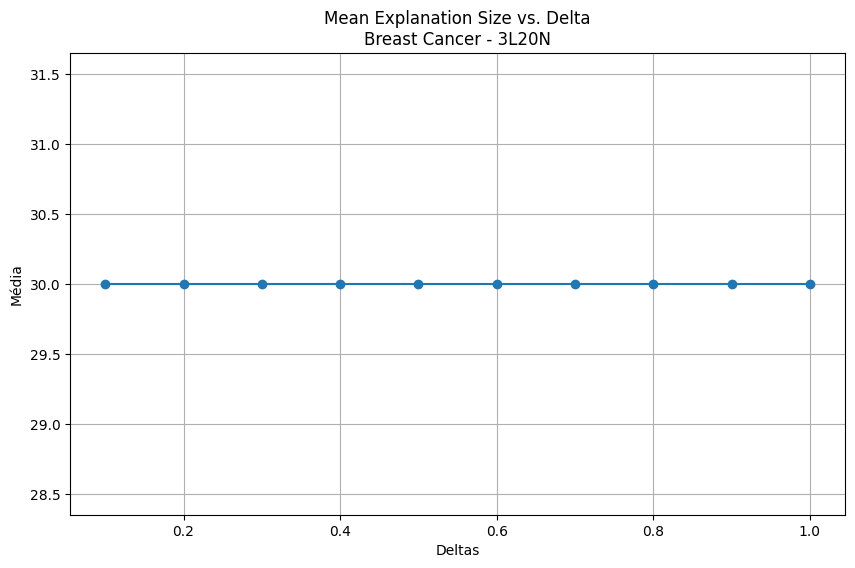

In [30]:
plot_mean_values(breast_cancer_m1, 'Mean Explanation Size vs. Delta\nBreast Cancer - 1L20N')
plot_mean_values(breast_cancer_m2, 'Mean Explanation Size vs. Delta\nBreast Cancer - 2L20N')
plot_mean_values(breast_cancer_m3, 'Mean Explanation Size vs. Delta\nBreast Cancer - 3L20N')

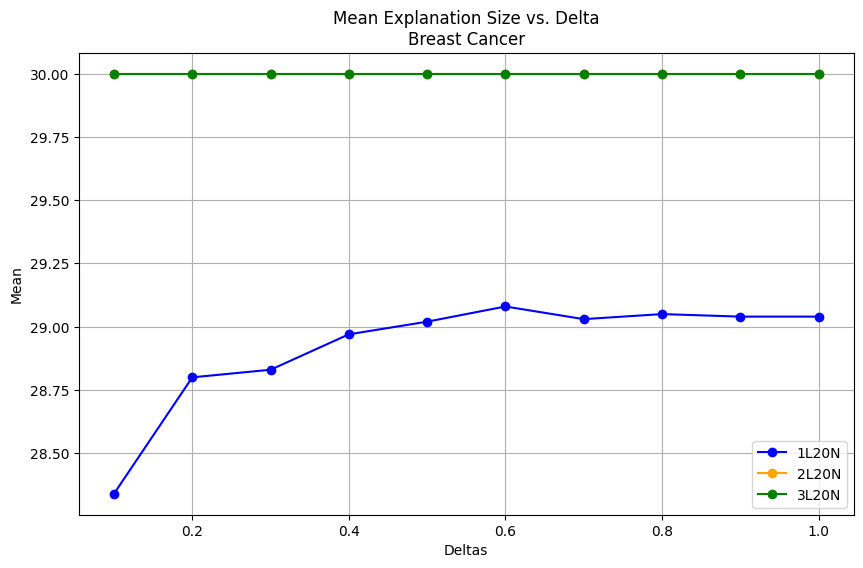

In [31]:
plot_multiple_means(
    dfs=[breast_cancer_m1, breast_cancer_m2, breast_cancer_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Explanation Size vs. Delta\nBreast Cancer',
    x_label='Deltas',
    y_label='Mean',
)

### Tempo

In [32]:
breast_cancer_m1, breast_cancer_m1_mean, breast_cancer_m1_std = process_model_data(breast_cancer, 'model_1layers_20neurons.h5', deltas, column_name='relaxed_times')
breast_cancer_m2, breast_cancer_m2_mean, breast_cancer_m2_std = process_model_data(breast_cancer, 'model_2layers_20neurons.h5', deltas, column_name='relaxed_times')
breast_cancer_m3, breast_cancer_m3_mean, breast_cancer_m3_std = process_model_data(breast_cancer, 'model_3layers_20neurons.h5', deltas, column_name='relaxed_times')

format_mean_std(breast_cancer_m1_mean, breast_cancer_m2_mean, breast_cancer_m3_mean, breast_cancer_m1_std, breast_cancer_m2_std, breast_cancer_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")


,1L20N,2L20N,3L20N
0.1,0.2310 ± 0.0246,0.3151 ± 0.0709,0.3597 ± 0.0893
0.2,0.2207 ± 0.0227,0.2796 ± 0.0403,0.3239 ± 0.0628
0.3,0.2226 ± 0.0212,0.2790 ± 0.0485,0.3216 ± 0.0644
0.4,0.2183 ± 0.0166,0.2787 ± 0.0323,0.3347 ± 0.0694
0.5,0.2278 ± 0.0295,0.2891 ± 0.0520,0.3248 ± 0.0619
0.6,0.2275 ± 0.0401,0.2737 ± 0.0328,0.3242 ± 0.0554
0.7,0.2327 ± 0.0462,0.2616 ± 0.0364,0.3239 ± 0.0643
0.8,0.2177 ± 0.0152,0.2632 ± 0.0399,0.3283 ± 0.0711
0.9,0.2191 ± 0.0181,0.2592 ± 0.0414,0.3278 ± 0.0728
1.0,0.2203 ± 0.0284,0.2630 ± 0.0359,0.3296 ± 0.0806


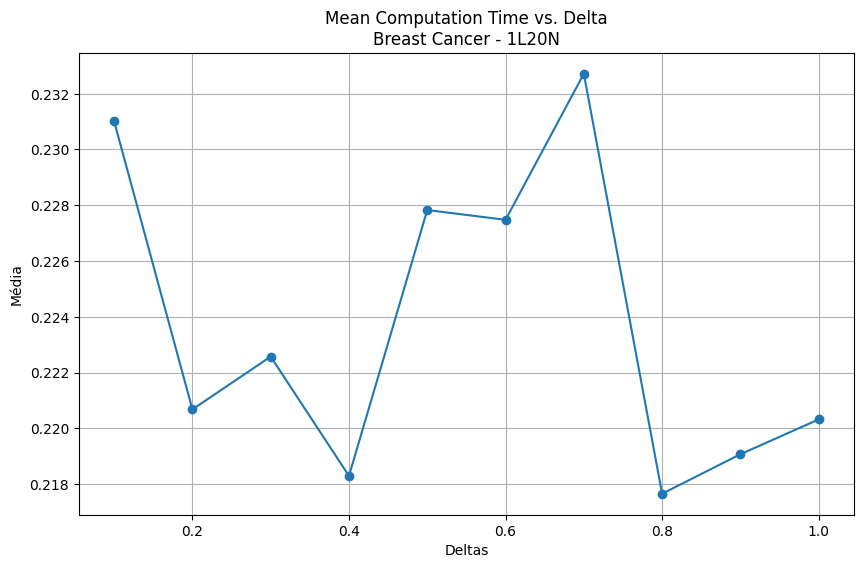

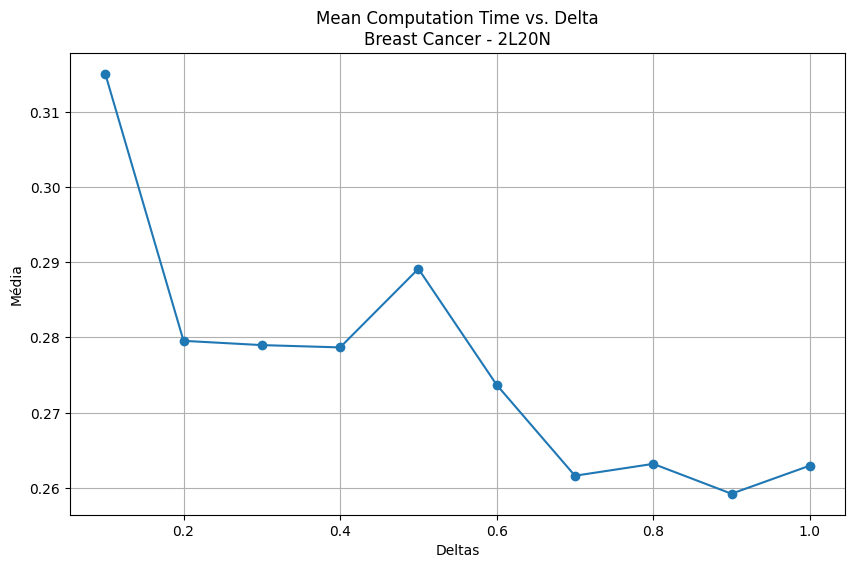

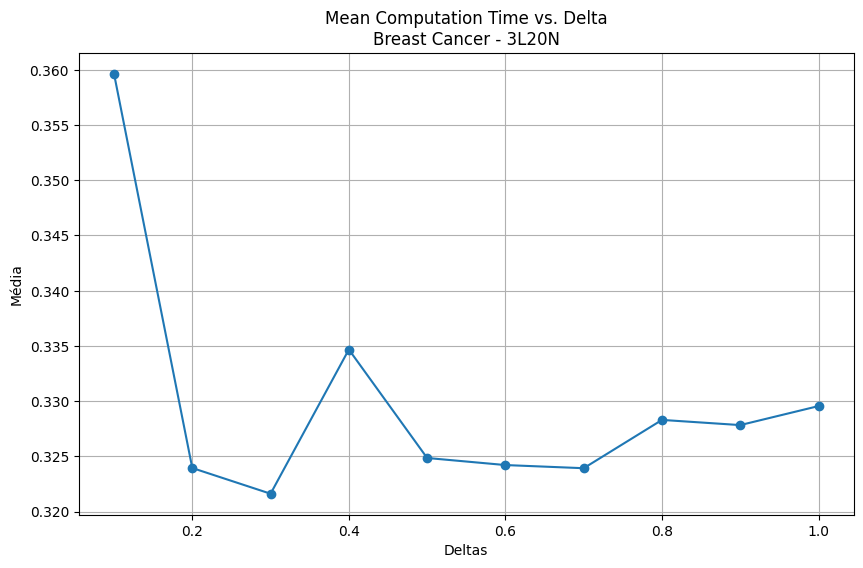

In [33]:
plot_mean_values(breast_cancer_m1, 'Mean Computation Time vs. Delta\nBreast Cancer - 1L20N')
plot_mean_values(breast_cancer_m2, 'Mean Computation Time vs. Delta\nBreast Cancer - 2L20N')
plot_mean_values(breast_cancer_m3, 'Mean Computation Time vs. Delta\nBreast Cancer - 3L20N')

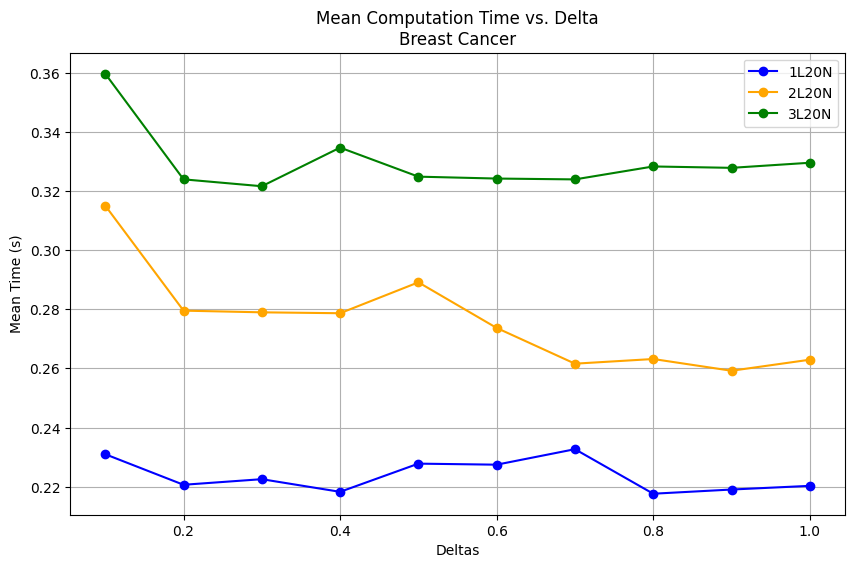

In [34]:
plot_multiple_means(
    dfs=[breast_cancer_m1, breast_cancer_m2, breast_cancer_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Computation Time vs. Delta\nBreast Cancer',
    x_label='Deltas',
    y_label='Mean Time (s)',
)

# Glass

In [35]:
glass_m1, glass_m1_mean, glass_m1_std = process_model_data(glass, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
glass_m2, glass_m2_mean, glass_m2_std = process_model_data(glass, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
glass_m3, glass_m3_mean, glass_m3_std = process_model_data(glass, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(glass_m1_mean, glass_m2_mean, glass_m3_mean, glass_m1_std, glass_m2_std, glass_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,8.94 ± 0.5970,9.00 ± 0.0000,9.00 ± 0.0000
0.2,8.96 ± 0.3980,9.00 ± 0.0000,9.00 ± 0.0000
0.3,8.97 ± 0.2985,9.00 ± 0.0000,9.00 ± 0.0000
0.4,8.97 ± 0.2985,9.00 ± 0.0000,9.00 ± 0.0000
0.5,8.98 ± 0.1990,9.00 ± 0.0000,9.00 ± 0.0000
0.6,8.98 ± 0.1990,9.00 ± 0.0000,9.00 ± 0.0000
0.7,8.98 ± 0.1990,9.00 ± 0.0000,9.00 ± 0.0000
0.8,8.98 ± 0.1990,9.00 ± 0.0000,9.00 ± 0.0000
0.9,8.98 ± 0.1990,9.00 ± 0.0000,9.00 ± 0.0000
1.0,8.98 ± 0.1990,9.00 ± 0.0000,9.00 ± 0.0000


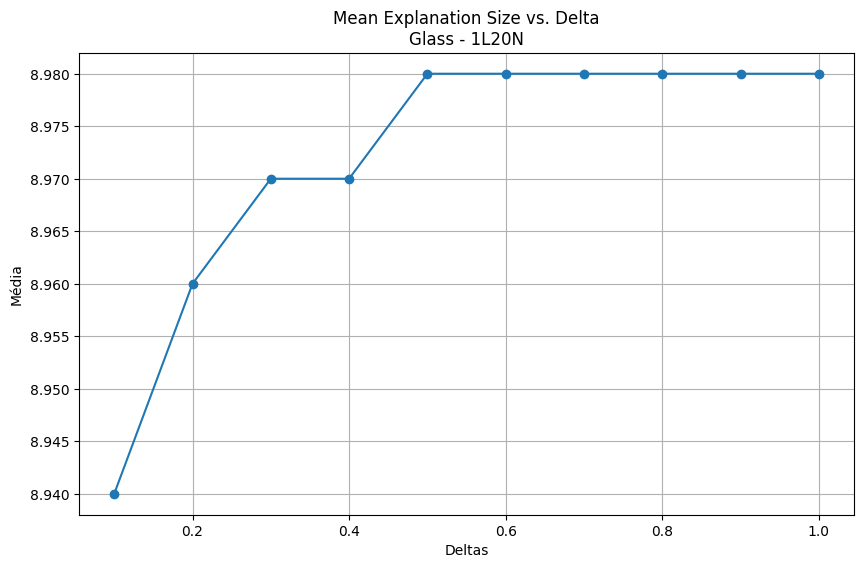

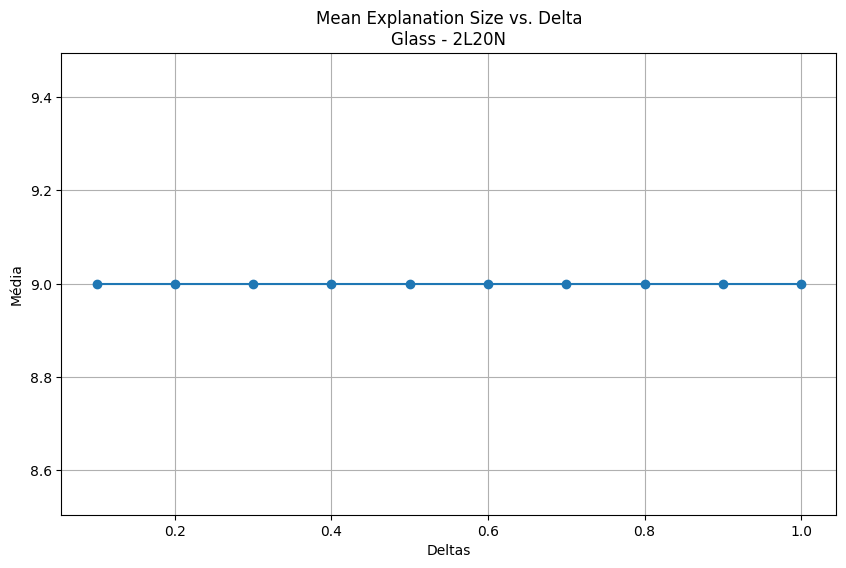

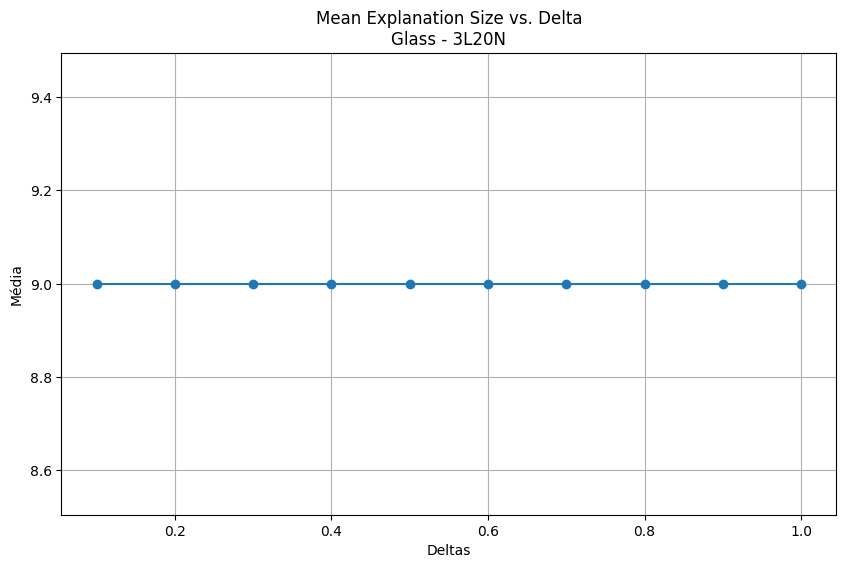

In [36]:
plot_mean_values(glass_m1, 'Mean Explanation Size vs. Delta\nGlass - 1L20N')
plot_mean_values(glass_m2, 'Mean Explanation Size vs. Delta\nGlass - 2L20N')
plot_mean_values(glass_m3, 'Mean Explanation Size vs. Delta\nGlass - 3L20N')

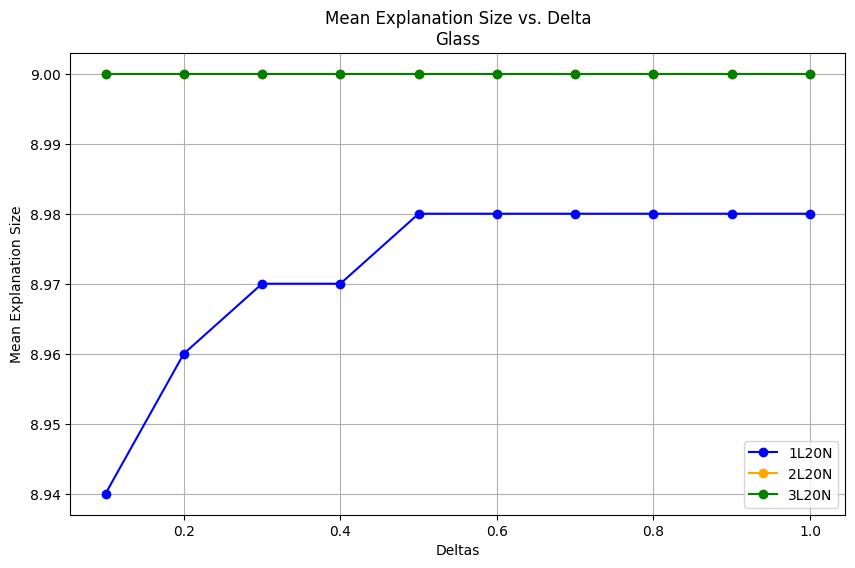

In [37]:
plot_multiple_means(
    dfs=[glass_m1, glass_m2, glass_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Explanation Size vs. Delta\nGlass',
    x_label='Deltas',
    y_label='Mean Explanation Size',
)

In [38]:
glass_m1, glass_m1_mean, glass_m1_std = process_model_data(glass, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_times")
glass_m2, glass_m2_mean, glass_m2_std = process_model_data(glass, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_times")
glass_m3, glass_m3_mean, glass_m3_std = process_model_data(glass, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_times")

format_mean_std(glass_m1_mean, glass_m2_mean, glass_m3_mean, glass_m1_std, glass_m2_std, glass_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.0969 ± 0.0295,0.1322 ± 0.0430,0.1266 ± 0.0274
0.2,0.0951 ± 0.0445,0.1260 ± 0.0675,0.1177 ± 0.0273
0.3,0.0912 ± 0.0286,0.1208 ± 0.0463,0.1175 ± 0.0240
0.4,0.0882 ± 0.0271,0.1100 ± 0.0264,0.1210 ± 0.0277
0.5,0.0817 ± 0.0220,0.1083 ± 0.0263,0.1179 ± 0.0304
0.6,0.0821 ± 0.0257,0.1091 ± 0.0307,0.1163 ± 0.0247
0.7,0.0793 ± 0.0119,0.1034 ± 0.0246,0.1145 ± 0.0204
0.8,0.0786 ± 0.0165,0.1112 ± 0.0381,0.1221 ± 0.0449
0.9,0.0767 ± 0.0124,0.1093 ± 0.0334,0.1180 ± 0.0303
1.0,0.0790 ± 0.0225,0.1122 ± 0.0398,0.1232 ± 0.0328


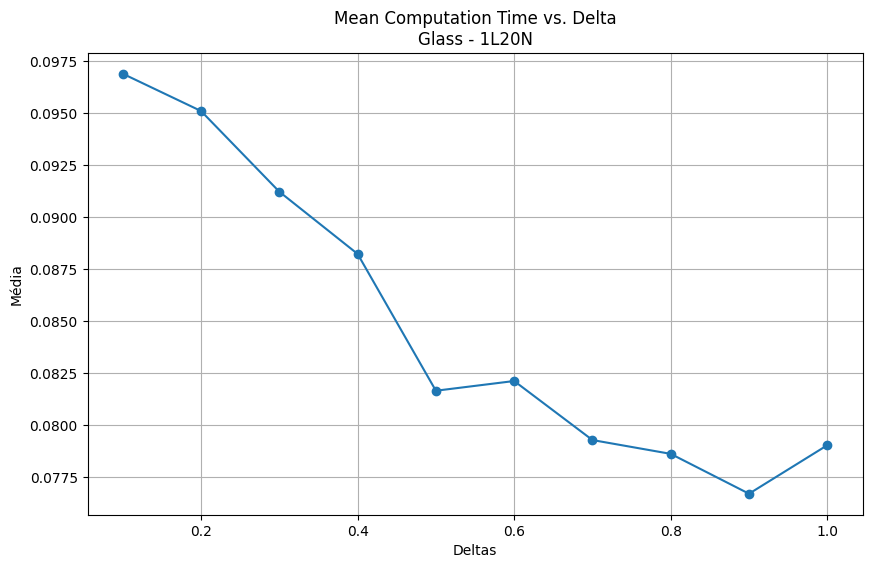

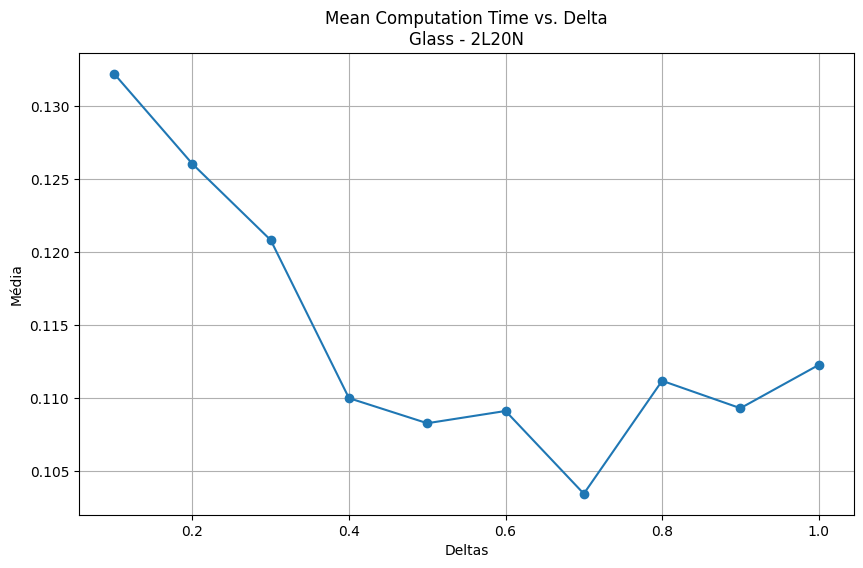

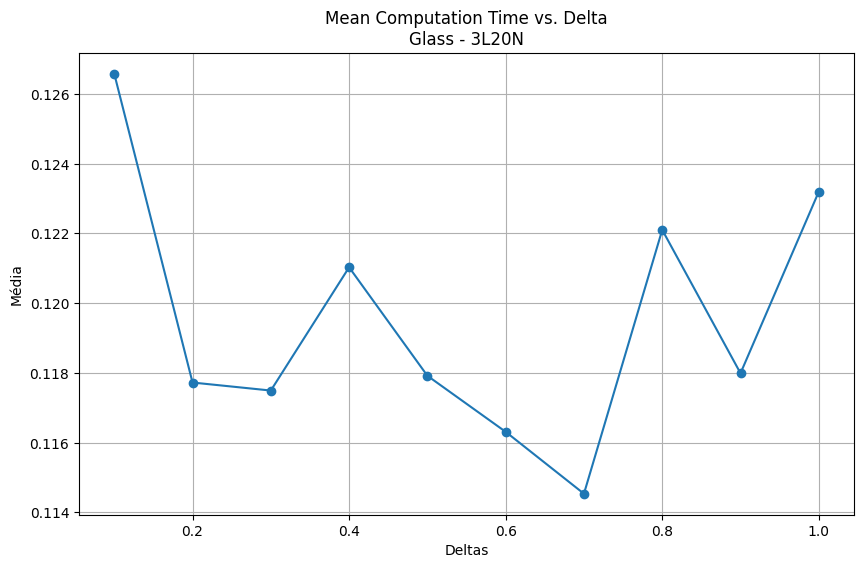

In [39]:
plot_mean_values(glass_m1, 'Mean Computation Time vs. Delta\nGlass - 1L20N')
plot_mean_values(glass_m2, 'Mean Computation Time vs. Delta\nGlass - 2L20N')
plot_mean_values(glass_m3, 'Mean Computation Time vs. Delta\nGlass - 3L20N')

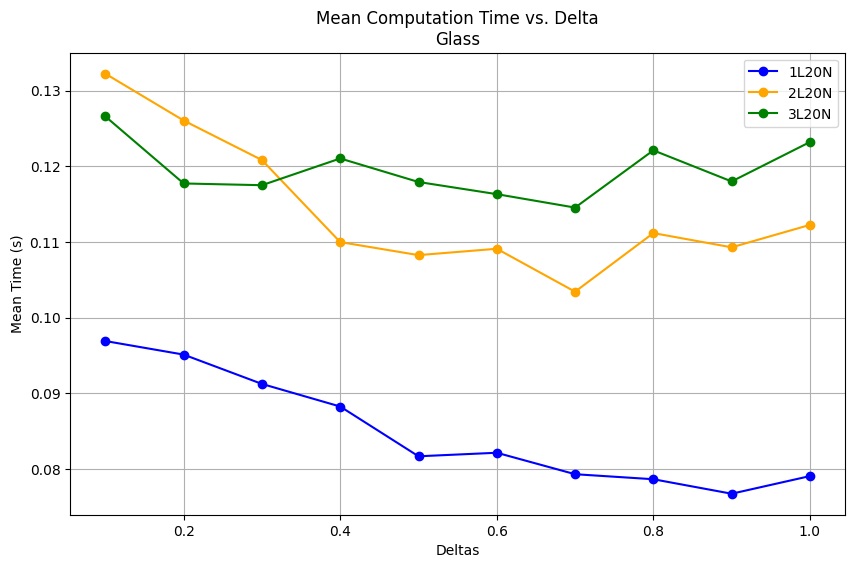

In [40]:
plot_multiple_means(
    dfs=[glass_m1, glass_m2, glass_m3],
    titles=['1L20N', '2L20N', '3L20N'],
    colors=['blue', 'orange', 'green'],
    plt_title='Mean Computation Time vs. Delta\nGlass',
    x_label='Deltas',
    y_label='Mean Time (s)',
)

# Digits

In [41]:
digits_m1, digits_m1_mean, digits_m1_std = process_model_data(digits, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
digits_m2, digits_m2_mean, digits_m2_std = process_model_data(digits, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
digits_m3, digits_m3_mean, digits_m3_std = process_model_data(digits, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(digits_m1_mean, digits_m2_mean, digits_m3_mean, digits_m1_std, digits_m2_std, digits_m3_std, deltas)

NameError: name 'digits' is not defined

In [ ]:
plot_mean_values(digits_m1, 'Mean Explanation Size vs. Delta\nDigits - 1L20N')
plot_mean_values(digits_m2, 'Mean Explanation Size vs. Delta\nDigits - 2L20N')
plot_mean_values(digits_m3, 'Mean Explanation Size vs. Delta\nDigits - 3L20N')

In [ ]:
digits_m1, digits_m1_mean, digits_m1_std = process_model_data(digits, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_times")
digits_m2, digits_m2_mean, digits_m2_std = process_model_data(digits, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_times")
digits_m3, digits_m3_mean, digits_m3_std = process_model_data(digits, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_times")

format_mean_std(digits_m1_mean, digits_m2_mean, digits_m3_mean, digits_m1_std, digits_m2_std, digits_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

In [ ]:
plot_mean_values(digits_m1, 'Mean Computation Time vs. Delta\nDigits - 1L20N')
plot_mean_values(digits_m2, 'Mean Computation Time vs. Delta\nDigits - 2L20N')
plot_mean_values(digits_m3, 'Mean Computation Time vs. Delta\nDigits - 3L20N')